## 결정트리 (분류, 회귀 문제)

* 결정트리란?

특정 변수에 대한 의사결정 규칙을 나무 가지가 뻗는 형태로 분류해 나가는 모델이다.스무고개 알고리즘과 매우 비슷하고 데이터 특성을 바탕으로 데이터를 연속적으로 분리하다 보면 결국 하나의 정답으로 분류할 수 있게 된다.

> max_depth 매개변수 값을 조정해서 가지치기를 할 수 있다

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

## 1. 분류 문제

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic_train.csv'
data = pd.read_csv(path)

In [3]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

data.groupby('Title')['Age'].median()

# Age 결측치를 Title 별 중앙값으로 채우기
# 타이틀의 중앙값 나이로 채움
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

# Embarked 최빈값으로 채우기
data['Embarked'].fillna('S', inplace=True)

# 변수 추가
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=[0, 16, 25, 35, 60, 100], 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']
data = pd.get_dummies(data, columns=dummy_vars, drop_first=True)

# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

In [4]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

In [5]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)  

#### 모델링

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
# 2단계: 선언하기
model = DecisionTreeClassifier(max_depth=5)

In [8]:
# 3단계: 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [9]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [10]:
# 5단계 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[156  12]
 [ 36  64]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       168
           1       0.84      0.64      0.73       100

    accuracy                           0.82       268
   macro avg       0.83      0.78      0.80       268
weighted avg       0.82      0.82      0.81       268



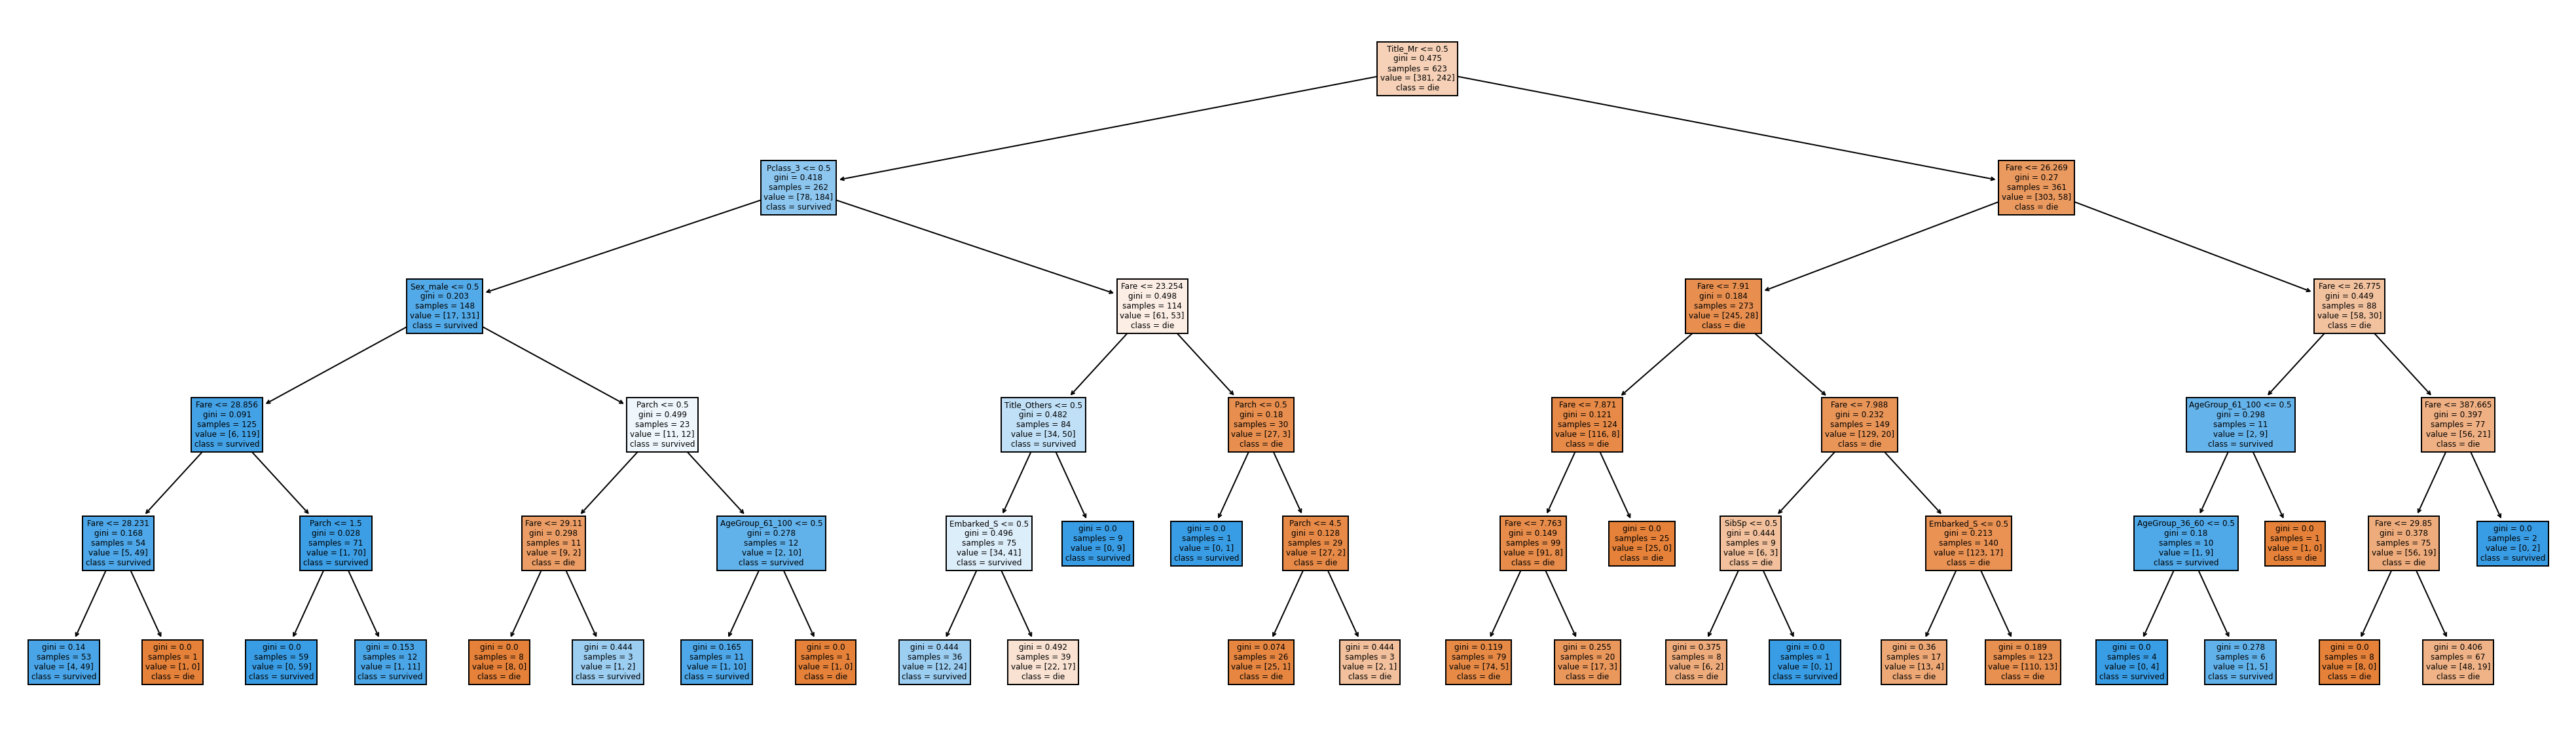

In [11]:
# 시각화 모듈 불러오기
from sklearn import tree

fig = plt.figure(figsize=(35, 10))
mytree = tree.plot_tree(model,
                        feature_names=x.columns,  
                        class_names=['die', 'survived'], 
                        filled=True)

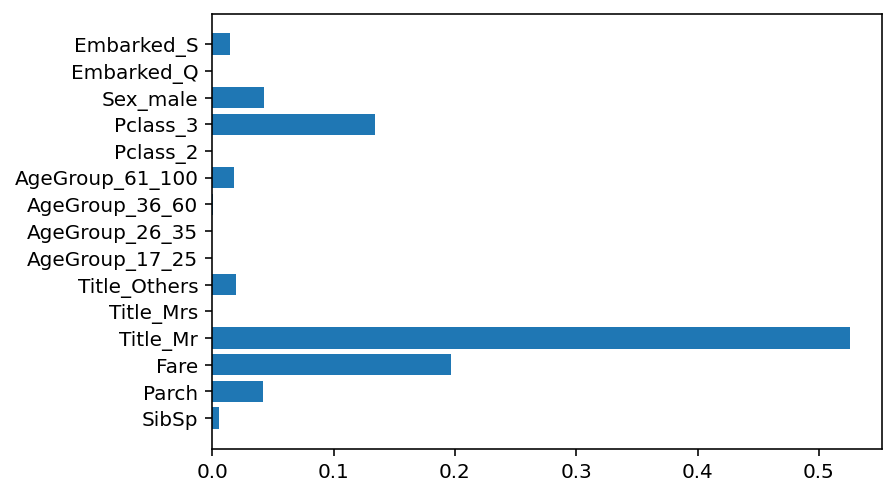

In [12]:
# 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

## 2. 회귀 문제

In [13]:
#데이터 불러오기
path = 'https://bit.ly/BostonFile'
data = pd.read_csv(path)

#확인
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [14]:
# x, y 분리
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [15]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [16]:
#모델링
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

3.2822368421052635
0.724813953528676


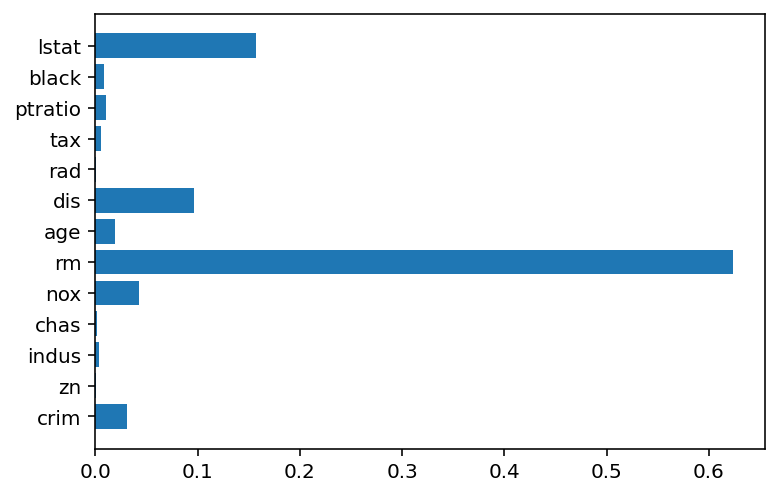

In [17]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()